# Greenland Land Ice Mass Trends from 2002 - 2024

In [2]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [3]:
# define path to the data file
path = "../data/greenland-mass-balance.csv"

In [4]:
# read file
df = pd.read_csv(path, skiprows=[0,1,2,3,4,5])

In [5]:
# interpolate data to account for gaps in data collection
df['mass_interp'] = df['NASA - Greenland land ice mass'].interpolate()
df['mass_balance_interp'] = df['IMBIE - Greenland cumulative mass balance'].interpolate()

df = df[df['Year'] >= 2002]

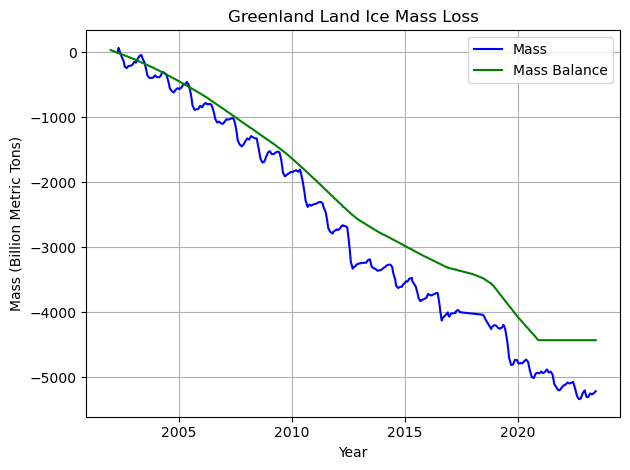

In [6]:
# plot the data
plt.plot(df['Year'], df['mass_interp'], label='Mass', color='blue')
plt.plot(df['Year'], df['mass_balance_interp'], label='Mass Balance', color='green')

plt.xlabel('Year')
plt.ylabel('Mass (Billion Metric Tons)')
plt.title('Greenland Land Ice Mass Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

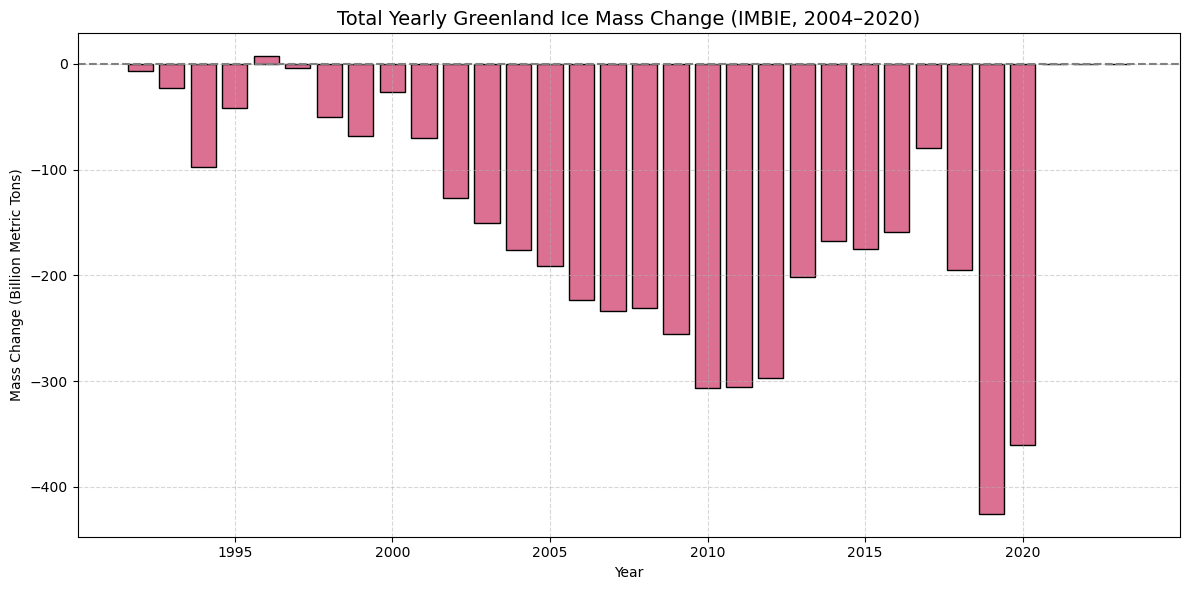

In [16]:
df = pd.read_csv(path, skiprows=[0,1,2,3,4,5])

# Filter the data between 2004 and 2020 before processing
df['mass_interp'] = df['NASA - Greenland land ice mass'].interpolate()
df['mass_balance_interp'] = df['IMBIE - Greenland cumulative mass balance'].interpolate()

df['Year'] = df['Year'].astype(int)

# Group by year and calculate the yearly change
yearly_change = df.groupby('Year')['mass_balance_interp'].agg(lambda x: x.iloc[-1] - x.iloc[0])

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(yearly_change.index, yearly_change.values, color='palevioletred', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Total Yearly Greenland Ice Mass Change (IMBIE, 2004–2020)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Mass Change (Billion Metric Tons)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
